# Lectura y graficación de una señal almacenada en un archivo txt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

## Leemos el archivo excluyendo las 2 primeras filas del archivo

In [95]:
Ts = 1/1000
Fs = 1/Ts
'''
Pantorrilla - Carlos
Prueba Pulgar - Carlos
Biceps Hercules - Carlos
Biceps Contra fuerza - Carlos
'''
array = np.genfromtxt("Biceps Contra fuerza - Carlos.txt", delimiter="	0	0	0	0	")
array = array[:,1][25000:]
t = np.arange(0, len(array))*Ts
len(t)*Ts

40.7

## Ploteamos la lectura

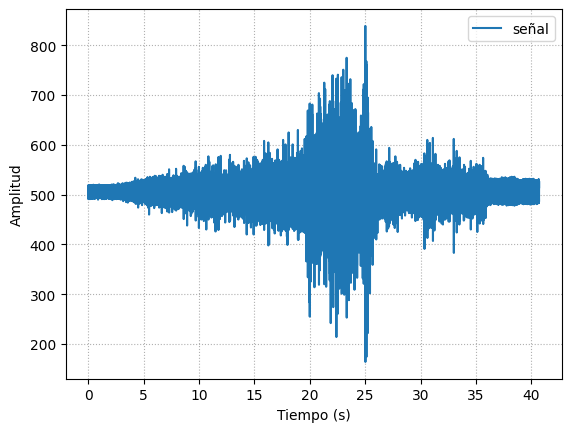

In [96]:
plt.plot(t, array, label="señal")      # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend(loc="upper right")
plt.show()

## La forma de sabes la frecuencia de la señal es viendo en el dominio de la frecuencia

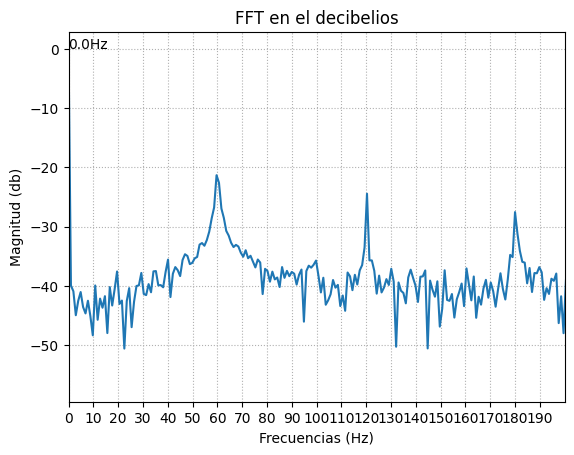

In [97]:
N = 2**10                                     # 10 bits, 0-1023

signal1 = array

signal_fft = np.fft.fft(signal1, N)           # fft magtinud
signal_fft = np.round(np.abs(signal_fft),3)[0:N//2] # nos quedamos con los componente de la derecha de la FFT
signal_aux = signal_fft/signal_fft.max()     # hallamos el maximo para pasar la magnitud a escala db

with np.errstate(divide='ignore'):
    signal_fft_db = 10*np.log10(signal_aux)  # , out=signal_aux, where=signal_aux >= 0 para evitar division por zero

F_list = np.linspace(0,Fs/2, N//2)
F = np.round(F_list[np.argmax(signal_fft_db)], 1)   # argmax, encuentra el argumento max en un array

plt.plot(F_list, signal_fft_db)  #10 * np.log10(P / Pref) , decibelios
plt.text(F,0, f"{F}Hz")
plt.grid(linestyle=":")
plt.ylabel("Magnitud (db)")
plt.xlabel("Frecuencias (Hz)")
plt.title("FFT en el decibelios")
plt.xlim([0,200])
plt.xticks(np.arange(0,200,10))
plt.show()